In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

# preparing data for training catboost (splitting test into test and validation in ratio 3:2)
def prepare():
    df = pd.read_csv("data_train.csv")
    y_train = df["density_percent"]
    X_train = df.drop("density_percent", axis=1)
    
    df_test = pd.read_csv("data_test.csv")
    y_df_test = df_test["density_percent"]
    X_df_test = df_test.drop("density_percent", axis=1)
    X_test, X_val, y_test, y_val = train_test_split(X_df_test, y_df_test,
                                                   random_state=np.random.randint(100000),
                                                   test_size=0.4)
    return (X_train, X_test, X_val, y_train, y_test, y_val)

In [4]:
from catboost import CatBoostRegressor, Pool, metrics

# function for creating trained model
def train(X_train, X_test, y_train, y_test, plot=False):
    model = CatBoostRegressor(
    #     custom_loss=[metrics.Accuracy()],
        logging_level="Silent"
    )

    model.fit(
        X_train, y_train,
        eval_set=(X_test, y_test),
        plot=plot,
    )
    return model

In [4]:
res = 0
n = 100
# evaluating average MAPE over n trained models for different test/validation splittings
for i in range(n):
    (X_train, X_test, X_val, y_train, y_test, y_val) = prepare()
    model = train(X_train, X_test, y_train, y_test)
    pred = model.predict(
        X_val
    )
    x = 100 * (np.abs(pred - y_val) / y_val).mean()
    res += x
    if (i + 1) % 10 == 0:
        print("Evaluated {}/{} models:\n average MAPE: {}".format(i + 1, n, res / (i + 1)))

Evaluated 10/100 models:
 average MAPE: 12.000348436407576
Evaluated 20/100 models:
 average MAPE: 12.312263617751402
Evaluated 30/100 models:
 average MAPE: 12.228545491680793
Evaluated 40/100 models:
 average MAPE: 12.423070319918425
Evaluated 50/100 models:
 average MAPE: 12.177340174222545
Evaluated 60/100 models:
 average MAPE: 11.994894887677736
Evaluated 70/100 models:
 average MAPE: 11.861050212438842
Evaluated 80/100 models:
 average MAPE: 11.849918023843715
Evaluated 90/100 models:
 average MAPE: 11.790369154537448
Evaluated 100/100 models:
 average MAPE: 11.874158691885068


In [5]:
# drawing nice plot
(X_train, X_test, X_val, y_train, y_test, y_val) = prepare()
model = train(X_train, X_test, y_train, y_test, True)
pred = model.predict(
    X_val
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

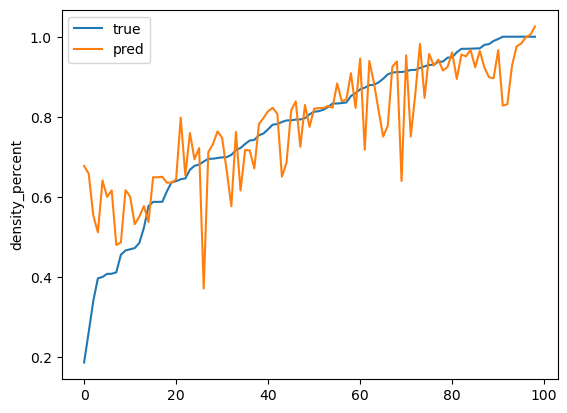

In [6]:
import matplotlib.pyplot as plt

y_val, pred = zip(*sorted(zip(y_val, pred)))
x = range(len(y_val))
plt.plot(x, y_val, label="true")
plt.plot(x, pred, label="pred")
plt.ylabel("density_percent")
plt.legend()